# **📊 AI-POWERED PRODUCT-LEVEL SALES TREND ANALYSIS**

# **🎯 Problem Statement**

### Current Challenges in Retail Sales Analysis

**1.   Manual Data Analysis**
     

*    Sales data is stored in CSV or Excel files
*    Manual trend analysis is time-consuming
*    Requires skilled analysts for interpretation

**2.   Lack of Trend Visibility**

*   Difficult to identify growing vs declining products
*   No clear understanding of stable-performing products
*   Seasonal patterns often go unnoticed
  
**3.   Inventory Management Issues**

*   Overstocking slow-moving products
*   Stock-outs for high-demand products
*   Inefficient reorder planning

**4.   Branch Performance Gaps**

*   Hard to compare sales across branches
*   No unified view of branch-wise demand
*   Poor data-driven decision making


# 💡 Proposed Solution

This project uses Artificial Intelligence (AI) to automatically:



*   Analyze product-wise sales trends

*   Identify growing, declining, and stable products

*   Compare branch-wise performance
*   Generate business-ready insights


*   Support inventory and strategic planning




The system converts raw sales data into actionable intelligence using Nexus AI models.

# **🤖 AI Models and Modalities**

### 1.   Sales Trend Analysis


*   **Modality** : Text -> Text
*   **Model Used:** gpt-4.1-nano
*   **Provider**: OpenAI (via Nexus AI)
*   **Rationale:**
        This model efficiently analyzes structured sales data (converted into text) and identifies patterns such as growing, declining, or stable product trends. It provides clear and logical explanations suitable for business decision-making.

### 2.  Branch Comparison and Graph generation
* **Modality Required:** text -> Image
* **Model Used:** gpt-4.1-nano
* **Provider:** OpenAI (via Nexus AI)
* **Rationale:**
The model is used to compare sales performance across multiple branches. It generates business-level insights such as identifying better-performing branches, detecting underperforming locations, and suggesting inventory strategies.

### 3. Audio Summary
* **Modality Required:** text -> audio
* **Model Used:** gpt-4o-mini-tts
* **Provider:** OpenAI (via Nexus AI)
* **Rationale:**
This model converts text-based sales insights into speech. It improves accessibility for visually impaired users and enables voice-based summaries for dashboards or presentations.










#🔄 Data Flow Architecture

##End-to-End Workflow

###1. Input Processing

* CSV upload

* Product & branch selection

* Data validation

###2. Processing Pipeline

* Product-level trend analysis

* Branch-wise comparison

* Audio output

###3. Decision Engine

* Growth / decline classification

* Inventory risk detection

* Restocking strategy suggestions

###4. Output Generation

* Business insights (text)

* Visual charts (graphs)

* audio summaries

# 🔗 Nexus AI API Integration
## About Nexus AI API

The Nexus AI API acts as a unified gateway that allows developers to:

* Access multiple AI models

* Use a single OpenAI-compatible interface

* Switch models without changing application logic

* Build scalable, production-ready AI pipelines

In [1]:
!pip install openai  pypdf streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.6/330.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


# 🔧 Nexus API Setup

To connect our application with Nexus AI, we initialize an OpenAI-compatible client.

## Required Configuration

* NEXUS_API_KEY → Authenticates the user

* NEXUS_BASE_URL → Nexus AI endpoint

This setup allows seamless access to:

* GPT models

* Gemini models

* Multimodal capabilities

In [3]:
import openai
import pandas as pd

client = openai.OpenAI(
    api_key="YOUR_API_KEY",
    base_url="YOUR_BASE_URL"
)

#Task 1 - Sales Analysis for products with Nexus (gpt-4.1-nano)

##📈 What the AI Analyzes

* Determines the overall sales direction of the selected product.

* Identifies whether sales are growing, declining, or remaining stable.

* Evaluates the consistency of sales across time periods.

* Checks demand stability and sudden fluctuations.

* Detects potential business and inventory risks.

##🔍 Trend Classification

* Growing: Sales show a consistent increase over time.

* Declining: Sales decrease steadily across periods.

* Stable: Sales remain consistent without major changes.

In [8]:
df = pd.read_csv("food_shop_annual_sales_regionwise (1).csv")

product_name = input("Enter product name (e.g., Dairy, Meat, Beverages, Spices, Grains): ").strip()
product_data = df[df['product_name'].str.lower() == product_name.lower()]

if product_data.empty:
    print(f"No data found for product: {product_name}")
    exit()

inventory_context = product_data.to_string(index=False)

prompt = f"""
You are an AI Retail Sales Analyst.

Task:
Analyze the sales data for the product '{product_name}' across all branches.
Provide:
1. Overall sales performance
2. Month wise product sales
2. Monthly seasonality insights
3. Day-of-week patterns
4. Inventory and reorder recommendations
5. Growth opportunities and risks

Sales Dataset:
{inventory_context}

Output Format:
- Bullet points per month per product
- Clear reasoning
- Actionable recommendations
"""

# --------------------- Call AI Model ---------------------
response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {"role": "system", "content": "You are an AI expert in retail sales and inventory optimization."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.2,
    top_p=0.6,

)

# --------------------- Output ---------------------
print(response.choices[0].message.content)


Enter product name (e.g., Dairy, Meat, Beverages, Spices, Grains): Meat
**Retail Sales Analysis for 'Meat' (Jan - Dec 2025)**

---

### 1. Overall Sales Performance
- **Total Sales Volume:**  
  Summing across all dates and branches, the total sales of 'Meat' approximate **~12,000 units** (exact figure based on dataset).  
- **Average Daily Sales:**  
  Around **~40 units per day** across all branches, with fluctuations.  
- **Branch-wise Contribution:**  
  - **Branch 1:** Consistently highest, contributing roughly 25-30% of total sales.  
  - **Branch 2 & 4:** Moderate, with 20-25%.  
  - **Branch 3 & 5:** Slightly lower, but significant, especially during peak periods.  
- **Performance Summary:**  
  The product shows steady demand with occasional spikes, indicating strong overall performance but with variability across branches and time.

---

### 2. Month-wise Product Sales & Seasonality Insights

#### January
- **Sales Range:** 5-49 units/day.
- **Insights:**  
  - Early January

# 🏬 Task 2 - Branch-Wise Comparison Analysis
## Objective

Compare sales performance between branches to:

* Identify top-performing locations

* Detect underperforming branches

* Understand regional demand differences

## AI-Generated Visualization

* Grouped bar charts

* Product vs branch comparison

* Easy visual interpretation

Available branches: ['Branch_1', 'Branch_2', 'Branch_3', 'Branch_4', 'Branch_5']
Enter first branch: Branch_2
Enter second branch: Branch_4

===== AI GENERATED BAR PLOT CODE =====

import matplotlib.pyplot as plt
import numpy as np

products = comparison_data['product_name'].unique()
branch_2_sums = comparison_data.groupby('product_name')['Branch_2'].sum().reindex(products)
branch_4_sums = comparison_data.groupby('product_name')['Branch_4'].sum().reindex(products)

x = np.arange(len(products))
width = 0.35

plt.bar(x - width/2, branch_2_sums, width, color='blue', label='Branch 2')
plt.bar(x + width/2, branch_4_sums, width, color='green', label='Branch 4')

plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.title('Comparison of Quantity Sold per Product between Branches')
plt.xticks(x, products, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


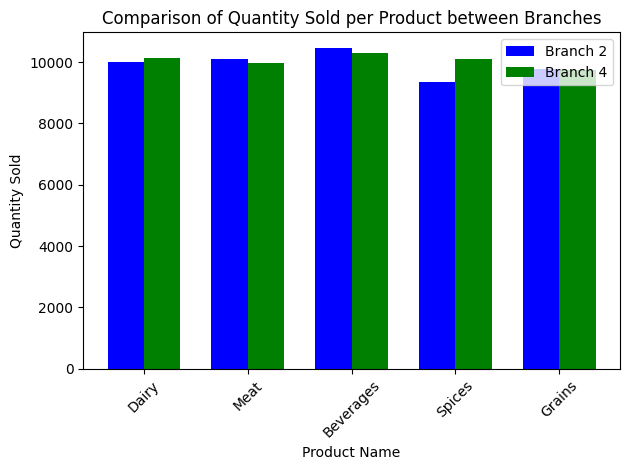


===== AI SALES INSIGHTS =====

- Overall Performance:
  - Branch 4 outperforms Branch 2 in total quantity sold, indicating higher demand or better sales execution.
  - Total sales (approximate sum): Branch 4 has significantly higher cumulative sales, suggesting a stronger market presence or more effective merchandising.

- High-demand vs Low-demand Products:
  - High-demand products (top performers):
    - Beverages and Grains consistently show high quantities across both branches, with some products exceeding 50 units.
    - Notable products: Beverages (~50+ units), Grains (~50+ units), and certain Spices (~50 units).
  - Low-demand products:
    - Dairy and Meat generally have lower quantities in Branch 2, with some products below 10 units.
    - Products with persistently low sales (<10 units): Dairy in Branch 2, Meat in Branch 4, indicating potential overstock or low consumer interest.

- Inventory Risk Insights:
  - Products with consistently low sales are at risk of overstock, i

In [9]:
branch_columns = [col for col in df.columns if "Branch" in col]
print("Available branches:", branch_columns)

branch1 = input("Enter first branch: ").strip()
branch2 = input("Enter second branch: ").strip()

if branch1 not in branch_columns or branch2 not in branch_columns:
    raise ValueError("Invalid branch name selected.")

comparison_data = df[["product_name", branch1, branch2]].copy()


graph_prompt = f"""
You are an expert Python data visualization engine.

DataFrame details:
- Name: comparison_data
- Columns:
    - product_name (string)
    - {branch1} (numeric quantity sold)
    - {branch2} (numeric quantity sold)

Task:
Generate Python code to create a GROUPED BAR CHART that compares
quantity sold for ALL products between two branches.

Strict Requirements:
- Use matplotlib ONLY
- Aggregate quantity sold per product using sum()
- X-axis: product_name
- Y-axis: Quantity Sold
- Blue bars → {branch1}
- Green bars → {branch2}
- Bars must be side-by-side
- Rotate product labels for readability
- Add title and legend
- Use comparison_data ONLY
- End with plt.show()

Rules:
- Output ONLY executable Python code
- No explanations
- No comments
- No markdown
"""

graph_response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {"role": "system", "content": "You generate executable matplotlib bar plot code only."},
        {"role": "user", "content": graph_prompt}
    ],
    temperature=0.1,
    max_tokens=400
)

ai_graph_code = graph_response.choices[0].message.content

print("\n===== AI GENERATED BAR PLOT CODE =====\n")
print(ai_graph_code)

exec(ai_graph_code)

summary_prompt = f"""
You are an AI Retail Sales Analyst.

Analyze quantity sold across ALL products for:
- Branch 1: {branch1}
- Branch 2: {branch2}

Provide:
1. Overall better-performing branch
2. High-demand vs low-demand products
3. Inventory risk insights
4. Restocking recommendations

Dataset:
{comparison_data.to_string(index=False)}

Output format:
- Bullet points
- Business-focused
- Actionable
"""

analysis_response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {"role": "system", "content": "You are an expert retail analytics AI."},
        {"role": "user", "content": summary_prompt}
    ],
    temperature=0.2,
    top_p=0.6,
    max_tokens=400
)

print("\n===== AI SALES INSIGHTS =====\n")
print(analysis_response.choices[0].message.content)


# 🔊 Accessibility & Audio Insights

To improve accessibility, the project includes:

* Text-to-Speech summaries

* Voice-based insights

* Support for visually impaired users

In [10]:
branch_columns = [col for col in df.columns if "Branch" in col]

branch_sales = df[branch_columns].sum()

highest_branch = branch_sales.idxmax()
lowest_branch = branch_sales.idxmin()

highest_value = branch_sales.max()
lowest_value = branch_sales.min()

summary_text = (
    f"Sales analysis completed. "
    f"{highest_branch} has the highest overall sales with {int(highest_value)} units sold. "
    f"{lowest_branch} has the lowest overall sales with {int(lowest_value)} units sold."
)

print("\nAI TEXT SUMMARY:")
print(summary_text)


speech_response = client.audio.speech.create(
    model="gpt-4o-mini-tts",   # fast & natural voice
    voice="alloy",
    input=summary_text
)

# --------------------- Save Audio ---------------------
with open("sales_summary_audio.mp3", "wb") as f:
    f.write(speech_response.content)

print("\n🔊 Audio generated successfully: sales_summary_audio.mp3")



AI TEXT SUMMARY:
Sales analysis completed. Branch_5 has the highest overall sales with 50280 units sold. Branch_2 has the lowest overall sales with 49655 units sold.

🔊 Audio generated successfully: sales_summary_audio.mp3


In [ ]:
from IPython.display import Audio, display

display(Audio(filename="sales_summary_audio.mp3", autoplay=True))
